<a href="https://colab.research.google.com/github/MaercioMamedes/numpy_alura/blob/main/numpy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Comparação entre Frutas com Análise de dados
## Utilizando um dataset modificado a partir da base de dados:
https://www.kaggle.com/datasets/joshmcadams/oranges-vs-grapefrui

In [1]:
# imports de bibliotecas

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# URL do dataset

url = "https://raw.githubusercontent.com/allanspadini/numpy/dados/citrus.csv"

In [3]:
# visualização da tabela

df_dataset = pd.read_csv(url)
df_dataset

,nome,diametro,peso,vermelho,verde,azul
0,orange,2.96,86.76,172,85,2
1,orange,3.91,88.05,166,78,3
2,orange,4.42,95.17,156,81,2
3,orange,4.47,95.60,163,81,4
4,orange,4.48,95.76,161,72,9
...,...,...,...,...,...,...
9995,grapefruit,15.35,253.89,149,77,20
9996,grapefruit,15.41,254.67,148,68,7
9997,grapefruit,15.59,256.50,168,82,20
9998,grapefruit,15.92,260.14,142,72,11


In [4]:
# colunas analisadas

columns = np.arange(1,5,1)
columns

array([1, 2, 3, 4])

In [5]:
# Array com todos os dados a serem analisados

dataset = np.loadtxt(url, skiprows=1, usecols=columns, delimiter=',')
dataset

array([[  2.96,  86.76, 172.  ,  85.  ],
       [  3.91,  88.05, 166.  ,  78.  ],
       [  4.42,  95.17, 156.  ,  81.  ],
       ...,
       [ 15.59, 256.5 , 168.  ,  82.  ],
       [ 15.92, 260.14, 142.  ,  72.  ],
       [ 16.45, 261.51, 152.  ,  74.  ]])

In [6]:
# valores da coluna `nome`

valores = df_dataset['nome'].unique()
valores

array(['orange', 'grapefruit'], dtype=object)

In [7]:
laranja = df_dataset.query(" nome == 'orange'")
toranja = df_dataset.query(" nome == 'grapefruit'")

In [8]:
laranja

,nome,diametro,peso,vermelho,verde,azul
0,orange,2.96,86.76,172,85,2
1,orange,3.91,88.05,166,78,3
2,orange,4.42,95.17,156,81,2
3,orange,4.47,95.60,163,81,4
4,orange,4.48,95.76,161,72,9
...,...,...,...,...,...,...
4995,orange,12.22,217.00,170,89,3
4996,orange,12.28,217.04,167,76,16
4997,orange,12.55,218.07,143,77,4
4998,orange,12.75,230.13,159,87,5


In [9]:
toranja

,nome,diametro,peso,vermelho,verde,azul
5000,grapefruit,7.63,126.79,150,74,24
5001,grapefruit,7.69,133.98,150,43,15
5002,grapefruit,7.72,135.56,150,54,21
5003,grapefruit,7.77,135.62,150,75,15
5004,grapefruit,7.84,136.63,149,77,20
...,...,...,...,...,...,...
9995,grapefruit,15.35,253.89,149,77,20
9996,grapefruit,15.41,254.67,148,68,7
9997,grapefruit,15.59,256.50,168,82,20
9998,grapefruit,15.92,260.14,142,72,11


### criando arrays selecionados

In [10]:
array_laranja = laranja[['diametro', 'peso']].to_numpy()
array_laranja

array([[  2.96,  86.76],
       [  3.91,  88.05],
       [  4.42,  95.17],
       ...,
       [ 12.55, 218.07],
       [ 12.75, 230.13],
       [ 12.87, 231.09]])

In [11]:
array_toranja = toranja[['diametro','peso']].to_numpy()
array_toranja

array([[  7.63, 126.79],
       [  7.69, 133.98],
       [  7.72, 135.56],
       ...,
       [ 15.59, 256.5 ],
       [ 15.92, 260.14],
       [ 16.45, 261.51]])

### criando arrays por parâmetro das frutas

In [12]:
peso_laranja = array_laranja[:, 1]
diametro_laranja = array_laranja[:,0]

In [13]:
peso_toranja = array_toranja[:,1]
diametro_toranja = array_toranja[:,0]

#### Construindo gráfico

Text(0, 0.5, 'Peso')

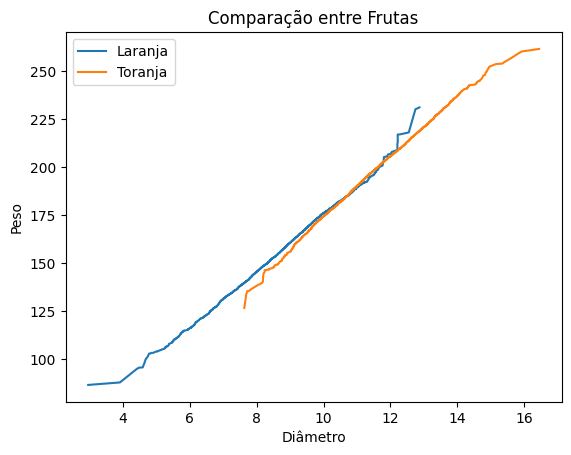

In [14]:
grafico = plt.plot(diametro_laranja, peso_laranja, label="Laranja")
grafico = plt.plot(diametro_toranja, peso_toranja)
grafico = plt.title("Comparação entre Frutas")
grafico = plt.legend(["Laranja", "Toranja"])
grafico = plt.xlabel("Diâmetro")
grafico = plt.ylabel("Peso")
grafico

### Regração Linear: Calculando os coeficientes da reta

Text(0, 0.5, 'Peso')

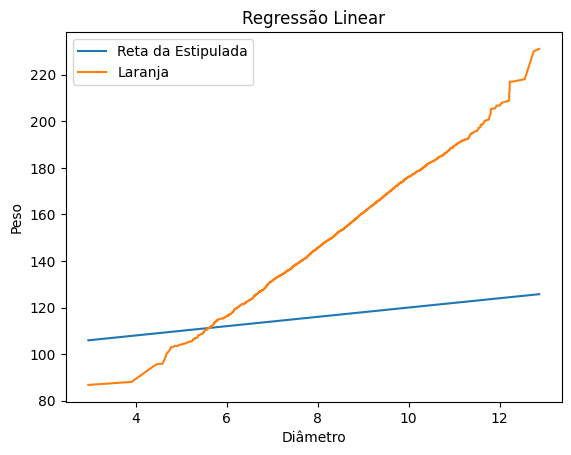

In [15]:
""" Traçando o gráfico de regressão Linear com parâmetros estipulados """

x_reta = diametro_laranja
y_reta = 2*x_reta + 100 # valores estipulados

grafico = plt.plot(x_reta, y_reta)
grafico = plt.plot(diametro_laranja, peso_laranja)
grafico = plt.legend(["Reta da Estipulada", "Laranja"])
grafico = plt.title("Regressão Linear")
grafico = plt.xlabel("Diâmetro")
grafico = plt.ylabel("Peso")

grafico

In [16]:
# diferança entre a curva e reta

diferenca = peso_laranja - y_reta
diferenca

array([-19.16, -19.77, -13.67, ...,  92.97, 104.63, 105.35])

In [17]:
# quadrado da diferença

quadrado_diferenca = np.power(diferenca, 2)
quadrado_diferenca

array([  367.1056,   390.8529,   186.8689, ...,  8643.4209, 10947.4369,
       11098.6225])

In [18]:
# soma dos quadrados

soma_quadrados = np.sum(quadrado_diferenca)
soma_quadrados

7732058.263599999

In [19]:
# extraindo a Raiz quadrada da soma dos quadrados

raiz_quadrada = np.sqrt(soma_quadrados)
raiz_quadrada

2780.657883235548

#### Calculando a norma da diferença de forma direta

In [20]:
np.linalg.norm(peso_laranja - y_reta)

2780.6578832355485

### coeficiente agunlar

\begin{equation}
 a = \frac{{n \cdot \sum(X \cdot Y) - \sum(X) \cdot \sum(Y)}}{{n \cdot \sum(X^2) - (\sum(X))^2}}
\end{equation}


In [27]:
# calculando o coeficiente angular da Reta

n = diametro_laranja.size
X = diametro_laranja
Y = peso_laranja

a = (n*np.sum(X*Y) - np.sum(X)*np.sum(Y))/(n*np.sum(X**2) - (np.sum(X))**2)
a

14.7997452319846

### coeficiente Liniear

\begin{equation}
 b = \bar{Y} - a \times \bar{X}
 \end{equation}

In [28]:
# calculando o coeficiente Linear

b = np.mean(Y) - a*np.mean(X)
b

27.38560381218413

In [29]:
# calculando a normalização da curva e da reta estimada

y_reta_estimada = x_reta*a + b
np.linalg.norm(Y - y_reta_estimada)

46.32284523962465

Text(0, 0.5, 'Peso')

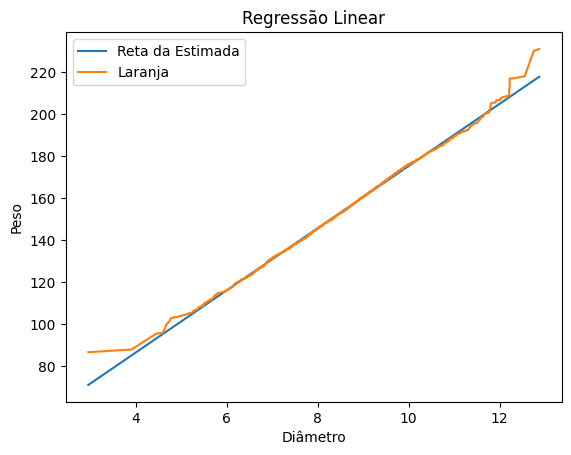

In [30]:
# construindo o novo gráfico

grafico = plt.plot(x_reta, y_reta_estimada)
grafico = plt.plot(diametro_laranja, peso_laranja)
grafico = plt.legend(["Reta da Estimada", "Laranja"])
grafico = plt.title("Regressão Linear")
grafico = plt.xlabel("Diâmetro")
grafico = plt.ylabel("Peso")
grafico